In [1]:
 url =  'https://raw.githubusercontent.com/thehellprogrammer/TelecomX_Latam_Parte_/refs/heads/main/TelecomX_limpio.csv'

In [3]:
import pandas as pd
datos_TelecomX = pd.read_csv(url)
datos_TelecomX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7035 entries, 0 to 7034
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7035 non-null   int64  
 1   gender            7035 non-null   object 
 2   SeniorCitizen     7035 non-null   int64  
 3   Partner           7035 non-null   int64  
 4   Dependents        7035 non-null   int64  
 5   tenure            7035 non-null   int64  
 6   PhoneService      7035 non-null   int64  
 7   MultipleLines     7035 non-null   object 
 8   InternetService   7035 non-null   object 
 9   OnlineSecurity    7035 non-null   object 
 10  OnlineBackup      7035 non-null   object 
 11  DeviceProtection  7035 non-null   object 
 12  TechSupport       7035 non-null   object 
 13  StreamingTV       7035 non-null   object 
 14  StreamingMovies   7035 non-null   object 
 15  Contract          7035 non-null   object 
 16  PaperlessBilling  7035 non-null   int64  


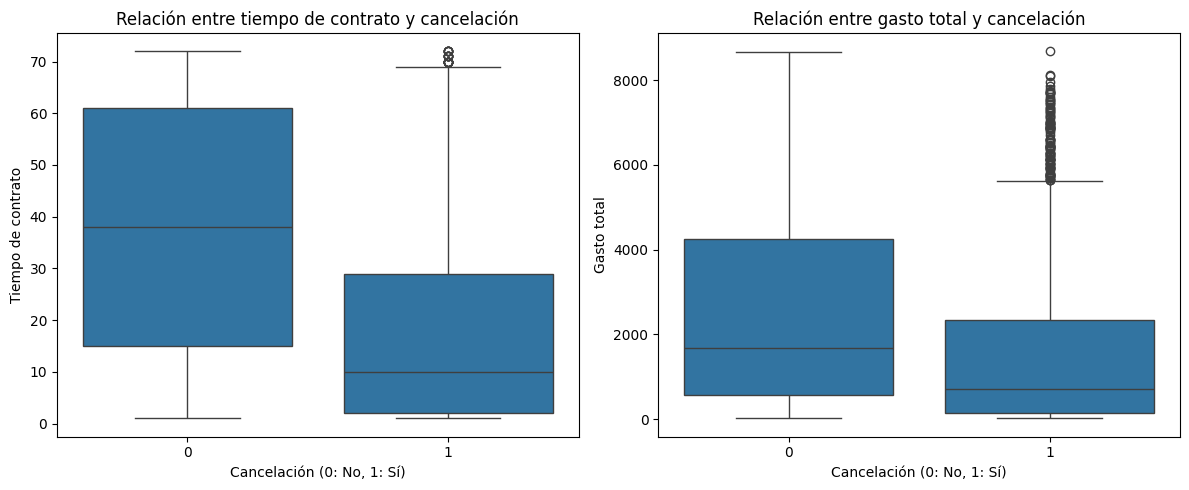

Training set shape (X_train, y_train): (5628, 19) (5628,)
Testing set shape (X_test, y_test): (1407, 19) (1407,)


Logistic Regression model trained.
Decision Tree model trained.


In [8]:
# Access the trained Logistic Regression model from the pipeline
logistic_model = logistic_regression_pipeline.named_steps['classifier']
preprocessor_step = logistic_regression_pipeline.named_steps['preprocessor']

# Get the feature names after preprocessing
# For numerical features, the names remain the same
numerical_feature_names = numerical_features.tolist()

# For categorical features, get the feature names from the one-hot encoder
categorical_transformer = preprocessor_step.named_transformers_['cat']
categorical_feature_names = categorical_transformer.get_feature_names_out(categorical_features).tolist()

# Combine all feature names
all_feature_names = numerical_feature_names + categorical_feature_names

# Get the coefficients
coefficients = logistic_model.coef_[0]

# Create a pandas Series to easily view coefficients and their corresponding feature names
coefficients_series = pd.Series(coefficients, index=all_feature_names)

# Display the coefficients
print("Coeficientes del modelo de Regresión Logística:")
display(coefficients_series.sort_values(ascending=False))

Coeficientes del modelo de Regresión Logística:


,0
Charges.Total,0.748434
Contract_Month-to-month,0.598885
InternetService_Fiber optic,0.511356
StreamingTV_1,0.163647
PaperlessBilling,0.160135
StreamingMovies_1,0.123105
PaymentMethod_Electronic check,0.111512
OnlineSecurity_0,0.110503
TechSupport_0,0.101985
SeniorCitizen,0.092394


Importancia de las variables (Árbol de Decisión):


,0
Charges.Monthly,0.192950
Charges.Total,0.182482
Contract_Month-to-month,0.167544
tenure,0.142094
InternetService_Fiber optic,0.047037
PaymentMethod_Electronic check,0.019118
TechSupport_0,0.016737
gender_Female,0.016001
PaperlessBilling,0.015169
Dependents,0.014249


## Conclusiones y recomendaciones para retener nuevos clientes

Basándonos en los análisis de los modelos de Regresión Logística y Árbol de Decisión, podemos extraer las siguientes conclusiones sobre los factores que más influyen en la cancelación de clientes:

**Variables clave identificadas por ambos modelos:**

*   **Tiempo de contrato (tenure):** Ambos modelos muestran que los clientes con menor tiempo de contrato (nuevos clientes) tienen una mayor probabilidad de cancelar. Esto se refleja en el coeficiente negativo significativo en la Regresión Logística y la alta importancia en el Árbol de Decisión.
*   **Cargo mensual (Charges.Monthly) y Cargo total (Charges.Total):** Estas variables tienen un impacto importante en la cancelación, aunque la dirección del impacto puede variar dependiendo del modelo y otras variables.
*   **Tipo de contrato (Contract):** Los contratos mes a mes tienen una asociación positiva con la cancelación en la Regresión Logística, mientras que los contratos a uno o dos años tienen una asociación negativa. El Árbol de Decisión también le otorga alta importancia a este factor.
*   **Servicio de Internet (InternetService_Fiber optic y DSL):** El servicio de fibra óptica parece estar asociado con una mayor probabilidad de cancelación en la Regresión Logística, mientras que el servicio DSL parece estar asociado con una menor probabilidad. El Árbol de Decisión también considera importante el tipo de servicio de internet.
*   **Método de pago (PaymentMethod_Electronic check):** El pago con cheque electrónico parece estar asociado con una mayor probabilidad de cancelación en la Regresión Logística. El Árbol de Decisión también le otorga cierta importancia.

**Foco para mantener a los nuevos clientes:**

Dado que el **tiempo de contrato (tenure)** es una de las variables más influyentes en la cancelación, especialmente en los primeros meses, es crucial enfocar los esfuerzos en la retención de clientes nuevos. Aquí hay algunas recomendaciones:

1.  **Programas de bienvenida y onboarding:** Implementar programas sólidos para asegurar que los nuevos clientes tengan una experiencia positiva desde el principio. Esto puede incluir soporte técnico proactivo, guías de uso de servicios y canales de comunicación fáciles de acceder.
2.  **Incentivos para contratos a largo plazo:** Ofrecer descuentos o beneficios adicionales a los clientes que opten por contratos de uno o dos años. Esto puede ayudar a reducir la rotación temprana.
3.  **Monitoreo proactivo del uso y la satisfacción:** Utilizar los datos de uso y encuestas de satisfacción para identificar a los nuevos clientes que puedan estar en riesgo de cancelar. Intervenir tempranamente con ofertas o soporte personalizado.
4.  **Evaluar y mejorar los servicios de Internet:** Dada la posible asociación del servicio de fibra óptica con la cancelación, es importante investigar las causas subyacentes. ¿Hay problemas de calidad del servicio? ¿La oferta es competitiva?
5.  **Optimizar los métodos de pago:** Si el pago con cheque electrónico está asociado con una mayor cancelación, analizar si hay fricciones en este proceso o si se pueden ofrecer alternativas más convenientes para los nuevos clientes.
6.  **Comunicación personalizada:** Mantener una comunicación regular y relevante con los nuevos clientes, ofreciendo consejos, promociones y recordatorios de los beneficios de sus servicios.

En resumen, para retener a los nuevos clientes, la empresa debe ser proactiva en la gestión de su experiencia desde el primer día, ofreciendo un buen servicio, opciones de contrato atractivas y canales de soporte eficientes.

## Conclusiones estratégicas sobre la cancelación de clientes

El análisis de los modelos de Regresión Logística y Árbol de Decisión revela que los principales factores que influyen en la cancelación de clientes son:

*   **Tiempo de contrato (tenure):** Los clientes nuevos son los más vulnerables a la cancelación.
*   **Cargos (Charges.Monthly y Charges.Total):** El costo de los servicios es un factor relevante.
*   **Tipo de contrato (Contract):** Los contratos mes a mes están asociados con una mayor rotación.
*   **Servicio de Internet (InternetService_Fiber optic y DSL):** El tipo de conexión a internet influye en la probabilidad de cancelar.
*   **Método de pago (PaymentMethod_Electronic check):** El uso de cheque electrónico como método de pago se asocia con una mayor cancelación.

**Recomendaciones estratégicas para la retención:**

Para reducir la cancelación, especialmente entre los clientes nuevos, la estrategia debe enfocarse en:

1.  **Fortalecer el proceso de onboarding:** Mejorar la experiencia inicial del cliente para generar lealtad desde el principio.
2.  **Promover contratos a largo plazo:** Incentivar la permanencia ofreciendo beneficios por compromisos de mayor duración.
3.  **Optimizar la oferta de servicios y métodos de pago:** Evaluar la competitividad del servicio de fibra óptica y la conveniencia del pago con cheque electrónico.
4.  **Implementar un sistema de monitoreo proactivo:** Identificar y actuar tempranamente sobre los clientes con riesgo de cancelar.

Enfoque prioritario: **la retención de clientes nuevos** a través de una gestión proactiva de su experiencia y la oferta de valor desde el inicio.